In [2]:
#  búsqueda de valores faltantes, valores atípicos/extremos u outliers y registros duplicados.
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Para manipular el archivo Excel usando Python instalamos la dependencia e importamos la biblioteca arriba

In [17]:
pip install openpyxl 

Note: you may need to restart the kernel to use updated packages.


#### Importamos el Dataset de Internet

In [18]:
# Leer todas las hojas del archivo Excel
internet_dataset = "Datasets\Internet.xlsx"
internet_file = pd.ExcelFile(internet_dataset)

<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13564\2447630919.py:2: SyntaxWarning: invalid escape sequence '\I'
  internet_dataset = "Datasets\Internet.xlsx"


#### Importamos las hojas que vamos a usar

In [20]:
accesos_por_tecnologia = pd.read_excel(internet_file, sheet_name='Accesos Por Tecnología') # Accesos por Tecnología
Totales_acc_tecno = pd.read_excel(internet_file, sheet_name='Totales Accesos Por Tecnología')

penetracion_hogares = pd.read_excel(internet_file, sheet_name='Penetracion-hogares') # penetración por hogar
total_pen_hog = pd.read_excel(internet_file, sheet_name='Penetracion-totales')

total_acc_velocidad = pd.read_excel(internet_file, sheet_name='Totales Accesos por velocidad') # accesos por velocidad
acc_por_velocidad = pd.read_excel(internet_file, sheet_name='Accesos por velocidad')

Dial_BAf = pd.read_excel(internet_file, sheet_name='Dial-BAf')
ingresos = pd.read_excel(internet_file, sheet_name='Ingresos ')

Se usa el metodo head() de pandas para poder visualizar las columnas, con el fin de tener una noción a nivel general sobre su composición y estadísticas.

In [10]:
# Recorrer todas las hojas para obtener un resumen descriptivo
for hoja in internet_file.sheet_names:
    print(f"\n--- Resumen de la hoja: {hoja} ---")
    df = pd.read_excel(internet_file, sheet_name=hoja)
    
    # Información general
    print("Información del DataFrame:")
    print(df.info())
    
    # Resumen estadístico
    print("\nResumen estadístico:")
    print(df.describe(include='all'))

    # Revisar valores nulos
    print("\nValores nulos por columna:")
    print(df.isnull().sum())
    
    # Revisar los primeros 5 datos para tener una idea de la estructura
    print("\nPrimeras 5 filas:")
    print(df.head())


--- Resumen de la hoja: Acc_vel_loc_sinrangos ---
Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Columns: 125 entries, Provincia to 10000 Mbps
dtypes: float64(121), object(4)
memory usage: 2.9+ MB
None

Resumen estadístico:
           Provincia    Partido Localidad Link Indec         Otros  \
count           3065       3065      3065       3065   1030.000000   
unique            24        432      2778       2664           NaN   
top     BUENOS AIRES  San Justo     Otros  Sin Datos           NaN   
freq             717         56        70         74           NaN   
mean             NaN        NaN       NaN        NaN    318.614563   
std              NaN        NaN       NaN        NaN   2964.939611   
min              NaN        NaN       NaN        NaN    -15.000000   
25%              NaN        NaN       NaN        NaN      1.000000   
50%              NaN        NaN       NaN        NaN      6.000000   
75%              NaN 

Análisis de las hojas que se consideran relevantes para el trabajo:
- Totales Accesos por velocidad
Columnas: Año, Trimestre, Hasta 512 kbps, Entre 512 Kbps y 1 Mbps, Entre 1 Mbps y 6 Mbps, Entre 6 Mbps y 10 Mbps, Entre 10 Mbps y 20 Mbps, Entre 20 Mbps y 30 Mbps, Más de 30 Mbps, OTROS, Total.
Datos: Todas las columnas parecen completas (sin valores nulos). Esto sugiere que esta hoja tiene un buen estado en términos de integridad de los datos.
Estadísticas: Se observa una gran variabilidad en las velocidades de acceso, con un aumento considerable en los accesos a velocidades superiores a 30 Mbps.

- Accesos por Velocidad:
Columnas: Año, Trimestre, Provincia, HASTA 512 kbps, + 512 Kbps - 1 Mbps, + 1 Mbps - 6 Mbps, + 6 Mbps - 10 Mbps, + 10 Mbps - 20 Mbps, + 20 Mbps - 30 Mbps, + 30 Mbps, OTROS, Total.
Datos: Hay valores nulos en la columna OTROS. Las demás columnas están completas.
Estadísticas: La mayoría de los accesos parecen concentrarse en velocidades superiores a 1 Mbps, con un número creciente de accesos en velocidades superiores a 30 Mbps, lo cual sugiere un cambio hacia velocidades más rápidas.

- Totales Accesos por Tecnología:
Columnas: Año, Trimestre, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total, Periodo.
Datos: No presenta valores nulos. El estado de los datos es sólido, y se observa un crecimiento constante en el total de accesos a lo largo del tiempo, especialmente en tecnologías como Cablemodem y Fibra óptica.
Estadísticas: Este crecimiento muestra una tendencia hacia el uso de tecnologías más rápidas y estables, como la fibra óptica

- Accesos por Tecnología: 
Verificación del Formato:
__Año, Trimestre: Formato object en lugar de int64, debería corregirse.__

- Penetración-totales:
Columnas: Año, Trimestre, Accesos por cada 100 hogares, Accesos por cada 100 hab, Periodo.
Datos: No hay valores nulos en las columnas. El estado de la hoja es bueno.
Estadísticas: Se observa una penetración significativa de los servicios de internet en la mayoría de los hogares, y también una alta cantidad de accesos por cada 100 habitantes, lo que indica un crecimiento constante en el uso de servicios de internet en la población general.

- Penetracion-hogares:
Columnas: Año, Trimestre, Provincia, Accesos por cada 100 hogares.
Datos: No hay valores nulos, lo cual sugiere que esta hoja está bien estructurada y completa.
Estadísticas: La penetración de internet en los hogares varía considerablemente entre provincias, siendo notablemente alta en provincias como Buenos Aires y Capital Federal.

- Dial-BAf:
Columnas: Año, Trimestre, Provincia, Banda ancha fija, Dial up, Total.
Datos: Existen algunos valores nulos en la columna Dial up, pero las demás columnas están completas.
Estadísticas: Los datos muestran una gran diferencia entre los accesos a Banda ancha fija y Dial up, con una fuerte predominancia de la banda ancha fija en todas las provincias.

- Ingresos:
Los datos en la hoja están completos y en el formato correcto, con los tipos de datos adecuados para cada columna.

Analizamos un poco el contenido de las hojas para ver qué podemos elaborar sobre ellas

In [21]:
penetracion_hogares.head(5)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


In [27]:
accesos_por_tecnologia.head(5)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


In [29]:
# Eliminar las filas con valores nulos en cualquier columna
accesos_por_tecnologia.dropna(inplace=True) 
print(accesos_por_tecnologia.isnull().sum())

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64


Para calcular el promedio (mean()), es necesario asegurarse de que solo las columnas numéricas se utilicen para realizar estos cálculos estadísticos como mean. Por ello primero seleccionamos las columnas numéricas antes de agrupar por provincia, para evitar problemas al calcular los promedios. 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13564\502148078.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accesos_tecnologia_por_provincia, x='Provincia', y='Total', palette='viridis')


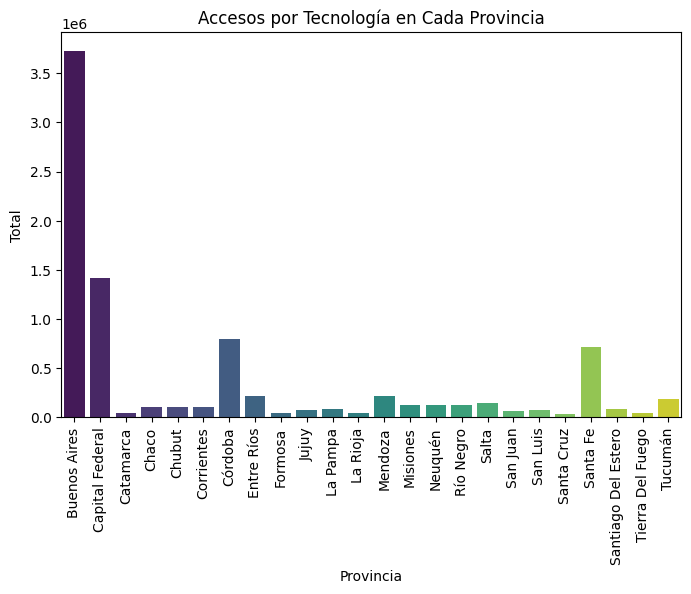

In [28]:
# Seleccionar solo las columnas numéricas antes de agrupar
accesos_tecnologia_numericas = accesos_por_tecnologia.select_dtypes(include='number')
penetracion_hogares_numericas = penetracion_hogares.select_dtypes(include='number')

# Asegurarse de que 'Provincia' siga siendo parte del DataFrame
accesos_tecnologia_numericas['Provincia'] = accesos_por_tecnologia['Provincia']
penetracion_hogares_numericas['Provincia'] = penetracion_hogares['Provincia']

# Agrupamos los datos por provincia y calculamos el promedio de los accesos por tecnología y penetración por hogares
accesos_tecnologia_por_provincia = accesos_tecnologia_numericas.groupby('Provincia').mean().reset_index()
penetracion_por_hogares = penetracion_hogares_numericas.groupby('Provincia').mean().reset_index()

# Crear gráfico de barras para los accesos por tecnología
plt.figure(figsize=(8, 5))
sns.barplot(data=accesos_tecnologia_por_provincia, x='Provincia', y='Total', palette='viridis')
plt.xticks(rotation=90)
plt.title('Accesos por Tecnología en Cada Provincia')
plt.show()

- Dominio de Buenos Aires y Capital Federal: Claramente, Buenos Aires y Capital Federal tienen el mayor número de accesos totales a internet, lo que sugiere una alta concentración de usuarios en estas áreas. Esto podría indicar una mayor demanda y penetración del servicio en las zonas más urbanizadas y desarrolladas.

- Bajo Nivel de Accesos en Provincias Menores: Provincias como Catamarca, La Rioja, Formosa y San Luis muestran un nivel considerablemente más bajo de accesos, lo que podría señalar una oportunidad de expansión de infraestructura y servicios de internet en estas regiones.

- Desigualdad en el Acceso: Existe una disparidad significativa en la cantidad de accesos entre las provincias, lo que sugiere que las inversiones en infraestructura y acceso a la tecnología no están distribuidas de manera uniforme.

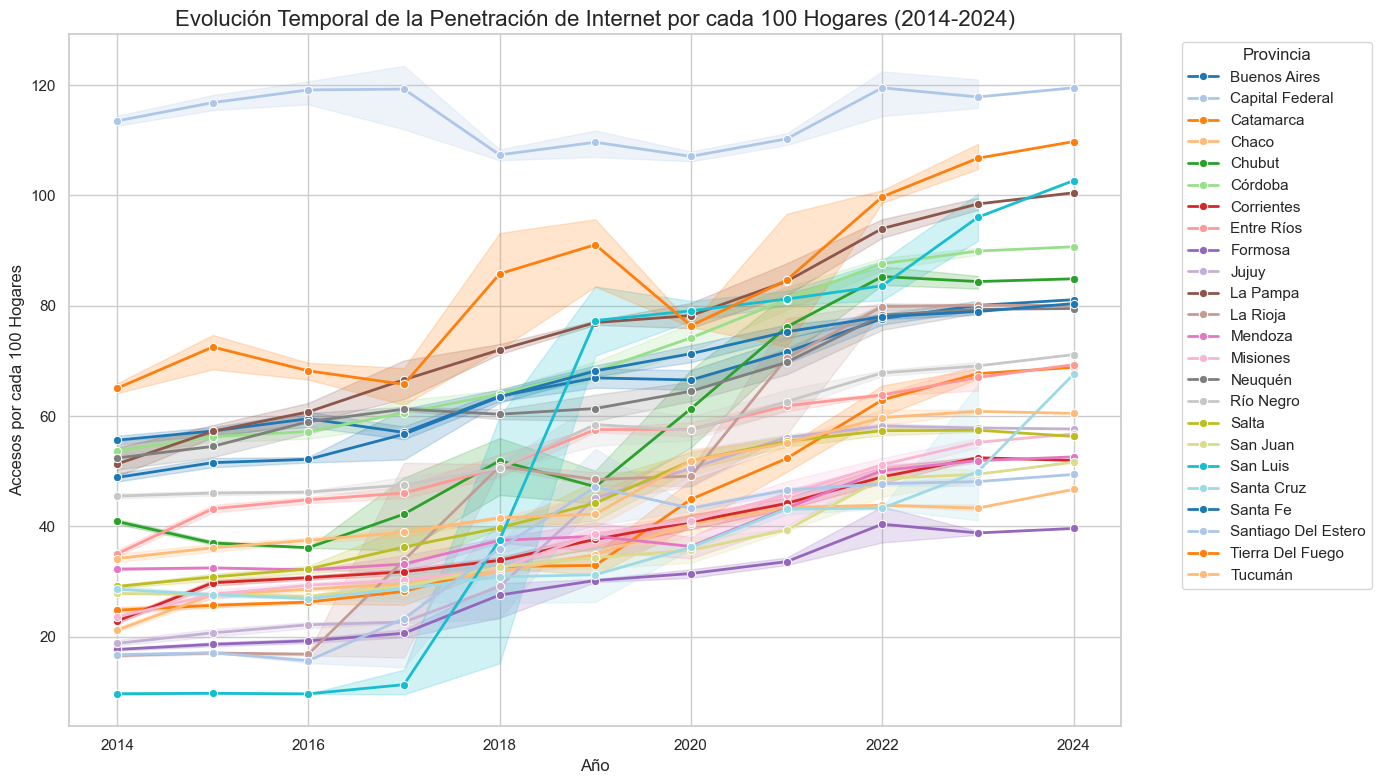

In [114]:
# Crear gráfico de líneas para mostrar la evolución temporal de la penetración de internet por cada 100 hogares
plt.figure(figsize=(14, 8))

# Generar el gráfico de líneas
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', hue='Provincia', data=penetracion_hogares, marker="o", palette='tab20', linewidth=2)

# Personalizar el gráfico
plt.title('Evolución Temporal de la Penetración de Internet por cada 100 Hogares (2014-2024)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Accesos por cada 100 Hogares', fontsize=12)
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico

# Mostrar el gráfico
plt.tight_layout()
plt.show()

- Incremento Generalizado de la Penetración de Internet: En la mayoría de las provincias, se observa un incremento constante en la penetración de internet a lo largo de los años. Este aumento refleja el crecimiento de la adopción de tecnologías de internet en los hogares a nivel nacional. Esto sugiere que la demanda de servicios de internet sigue creciendo, lo cual es una oportunidad para que la empresa siga invirtiendo en mejorar la infraestructura y oferta de servicios de internet.
- Diferencias entre Provincias: Hay grandes variaciones en la penetración de internet entre provincias,provincias como Capital Federal y Tierra del Fuego tienen una penetración significativamente mayor que otras como Formosa y Santiago Del Estero. Esto indica áreas donde las provincias más rezagadas, necesitan una mayor inversión en infraestructura para cerrar la brecha digital. La empresa de telecomunicaciones podría priorizar estas regiones para expansión y mejora de los servicios.
- Estancamiento o Descenso en Algunas Provincias: Aunque en la mayoría de las provincias la penetración ha aumentado, en algunas como San Luis y Río Negro, la curva muestra signos de estancamiento o menor crecimiento en los últimos años. Este comportamiento sugiere que, en estas provincias, la empresa podría investigar las causas detrás del estancamiento. Tal vez existan barreras económicas, geográficas o de infraestructura que podrían ser atendidas para reactivar el crecimiento.

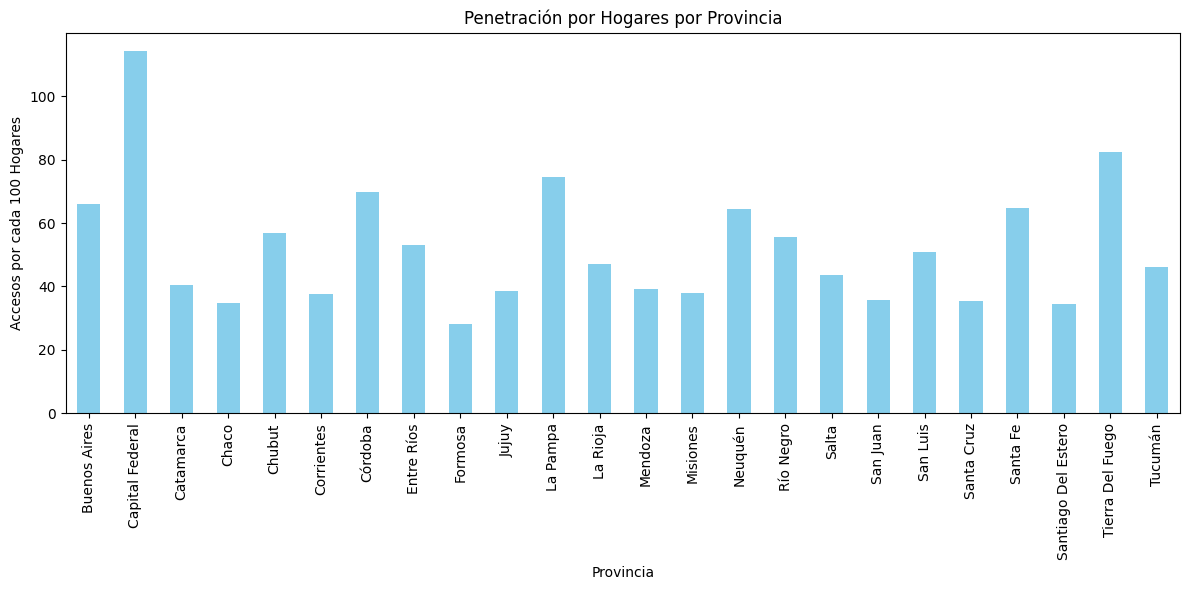

In [24]:
# Graficar Penetración por Hogares por Provincia
plt.figure(figsize=(12, 6))
penetracion_hogares.groupby('Provincia')['Accesos por cada 100 hogares'].mean().plot(kind='bar', color='skyblue')
plt.title('Penetración por Hogares por Provincia')
plt.ylabel('Accesos por cada 100 Hogares')
plt.xlabel('Provincia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Analicemos la evolución de los Accesos por Tecnología

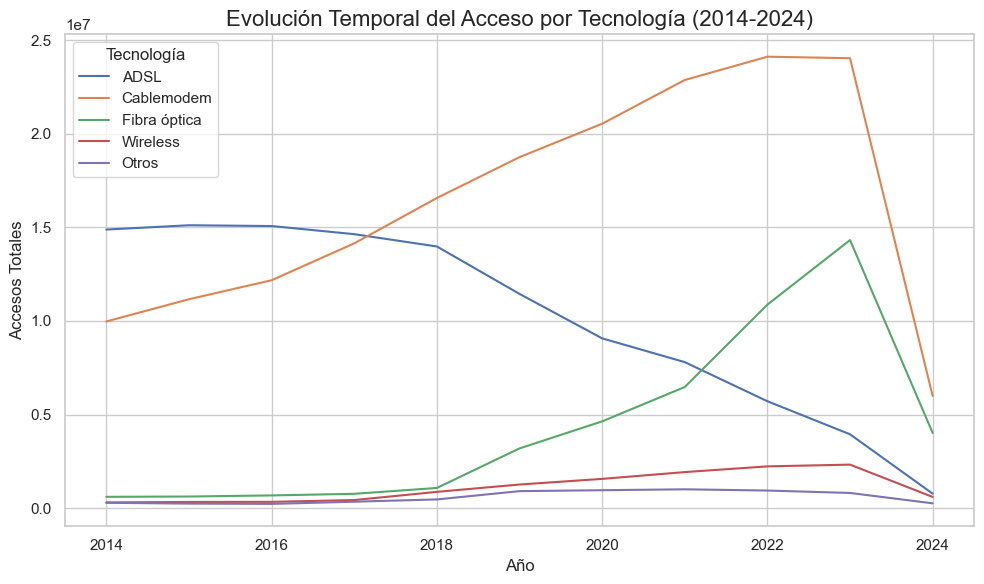

In [130]:
# Datos para el gráfico (asegúrate de tener el DataFrame 'Totales_acc_tecno' cargado)
data_tecnologia = Totales_acc_tecno.groupby(['Año']).sum().reset_index()

# Crear el gráfico de evolución temporal por tecnología
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='ADSL', data=data_tecnologia, label='ADSL')
sns.lineplot(x='Año', y='Cablemodem', data=data_tecnologia, label='Cablemodem')
sns.lineplot(x='Año', y='Fibra óptica', data=data_tecnologia, label='Fibra óptica')
sns.lineplot(x='Año', y='Wireless', data=data_tecnologia, label='Wireless')
sns.lineplot(x='Año', y='Otros', data=data_tecnologia, label='Otros')

plt.title('Evolución Temporal del Acceso por Tecnología (2014-2024)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Accesos Totales', fontsize=12)
plt.legend(title='Tecnología')
plt.grid(True)
plt.tight_layout()

plt.show()

- Migración tecnológica: La evolución muestra una clara migración de tecnologías más antiguas como ADSL hacia tecnologías más rápidas y modernas como la fibra óptica. Esto está impulsado por la creciente demanda de internet de alta velocidad y la mejora de la infraestructura.
- Transición en el mercado: Aunque Cablemodem sigue siendo relevante, la fibra óptica está ganando rápidamente terreno y podría reemplazarlo como la principal tecnología de acceso en los próximos años.
- Oportunidades para expansión de Fibra Óptica: Dado el incremento sustancial en la adopción de fibra óptica, hay una clara oportunidad para la expansión de esta tecnología, especialmente en áreas urbanas y periurbanas.

A través del archivo excel nos percatamos de que en las celdas del año 2019 y algunos trimestres, los valores al final tenían un asterísco, los cuales a posterior serían un problema

In [167]:
# Filtrar las filas donde la columna 'Año' o 'Trimestre' contenga un asterisco
filas_con_asterisco = accesos_por_tecnologia[(accesos_por_tecnologia['Año'].astype(str).str.contains(r'\*')) | 
                                             (accesos_por_tecnologia['Trimestre'].astype(str).str.contains(r'\*'))]

# Mostrar las filas que contienen asteriscos
filas_con_asterisco.head(5)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total


Vamos a corregirlo con el método replace(). Para buscar el asterisco con \*. Esto lo elimina en las columnas 'Año' y 'Trimestre'. Luego lo convertimos a numérico ya que al tener asterisco era considerado como string. El argumento errors='coerce', convierte cualquier valor no convertible a NaN, lo que ayuda a manejar datos sucios de manera eficiente

In [51]:
# Reemplazar el asterisco en las columnas 'Año' y 'Trimestre'
accesos_por_tecnologia['Año'] = accesos_por_tecnologia['Año'].replace(r'\*', '', regex=True)
accesos_por_tecnologia['Trimestre'] = accesos_por_tecnologia['Trimestre'].replace(r'\*', '', regex=True)

# Convertir a tipo numérico después de eliminar los asteriscos
accesos_por_tecnologia['Año'] = pd.to_numeric(accesos_por_tecnologia['Año'], errors='coerce')
accesos_por_tecnologia['Trimestre'] = pd.to_numeric(accesos_por_tecnologia['Trimestre'], errors='coerce')

# Mostrar el DataFrame para verificar los cambios
accesos_por_tecnologia.head(5)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


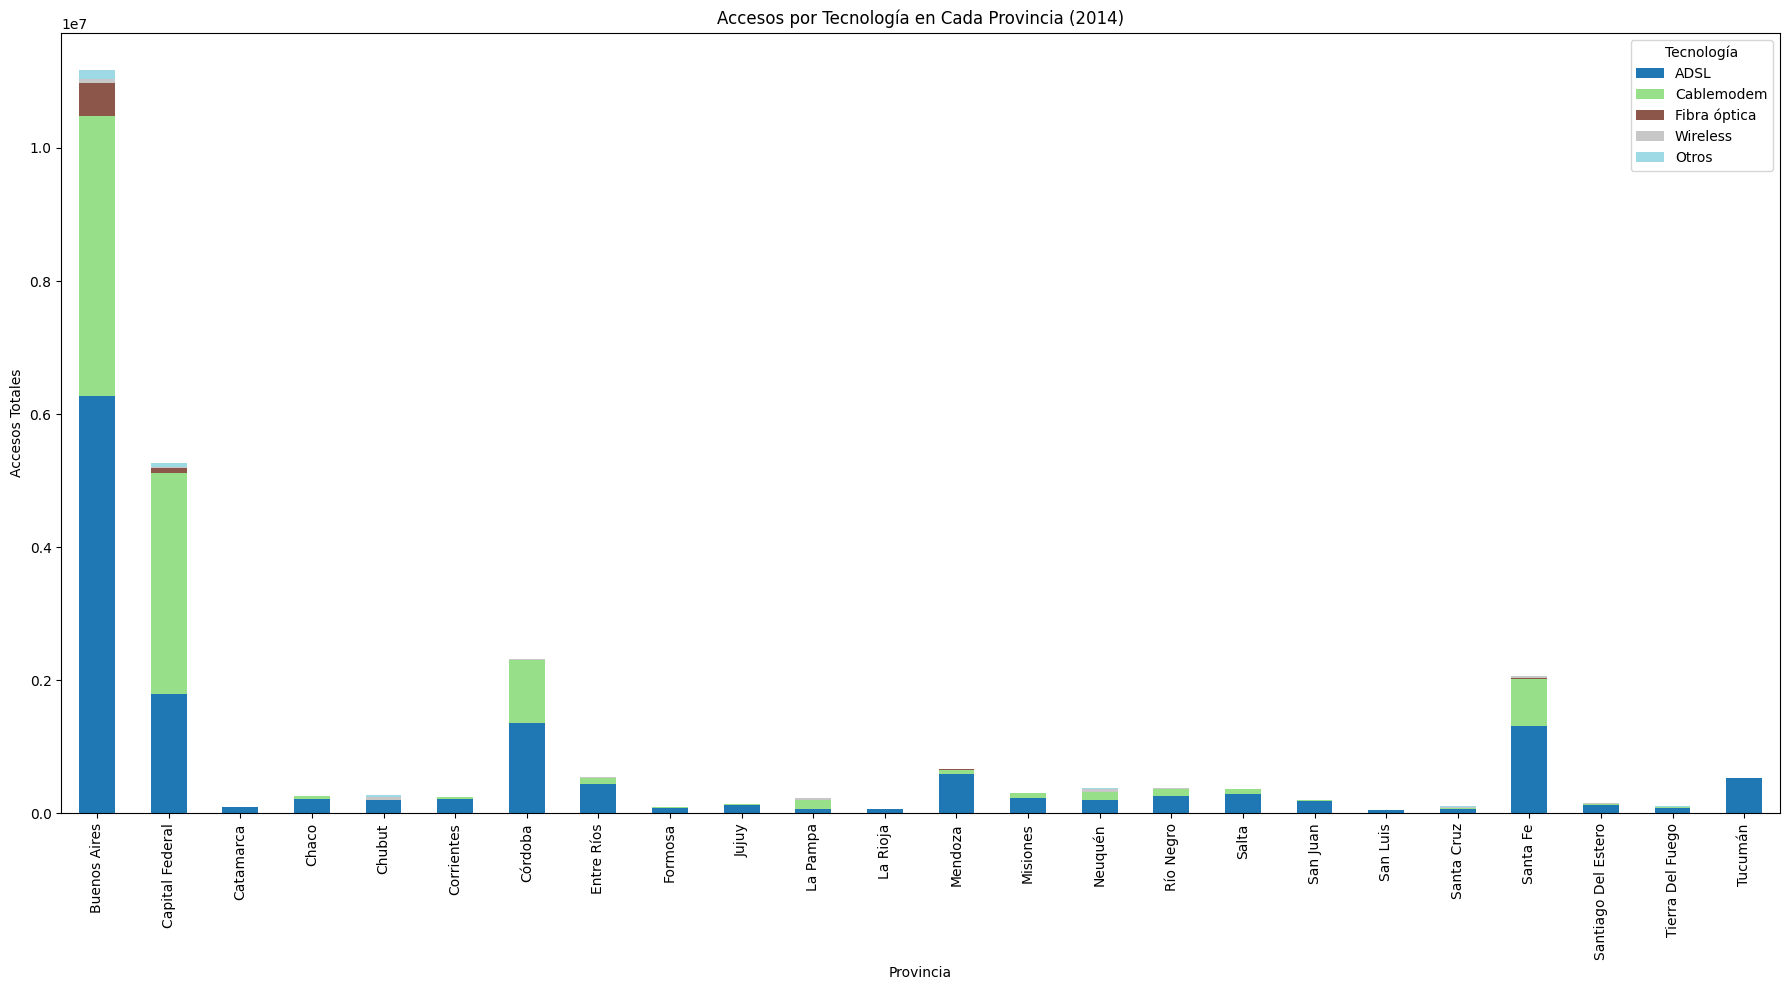

In [47]:
# Filtrar datos para el año 2014
accesos_2014 = accesos_por_tecnologia[accesos_por_tecnologia['Año'] == 2014]

# Agrupar por provincia y sumar los accesos por tecnología
accesos_agrupados = accesos_2014.groupby('Provincia')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Crear gráfico de barras apiladas por tecnología
fig, ax = plt.subplots(figsize=(18, 10))

# Graficar datos agrupados
accesos_agrupados.plot(kind='bar', stacked=True, ax=ax, cmap='tab20')

# Ajustar las etiquetas y el layout
plt.title('Accesos por Tecnología en Cada Provincia (2014)')
plt.ylabel('Accesos Totales')
plt.xlabel('Provincia')
plt.xticks(rotation=90, fontsize=10)  # Reducir el tamaño de las etiquetas
plt.legend(title='Tecnología')
plt.tight_layout()

plt.show()

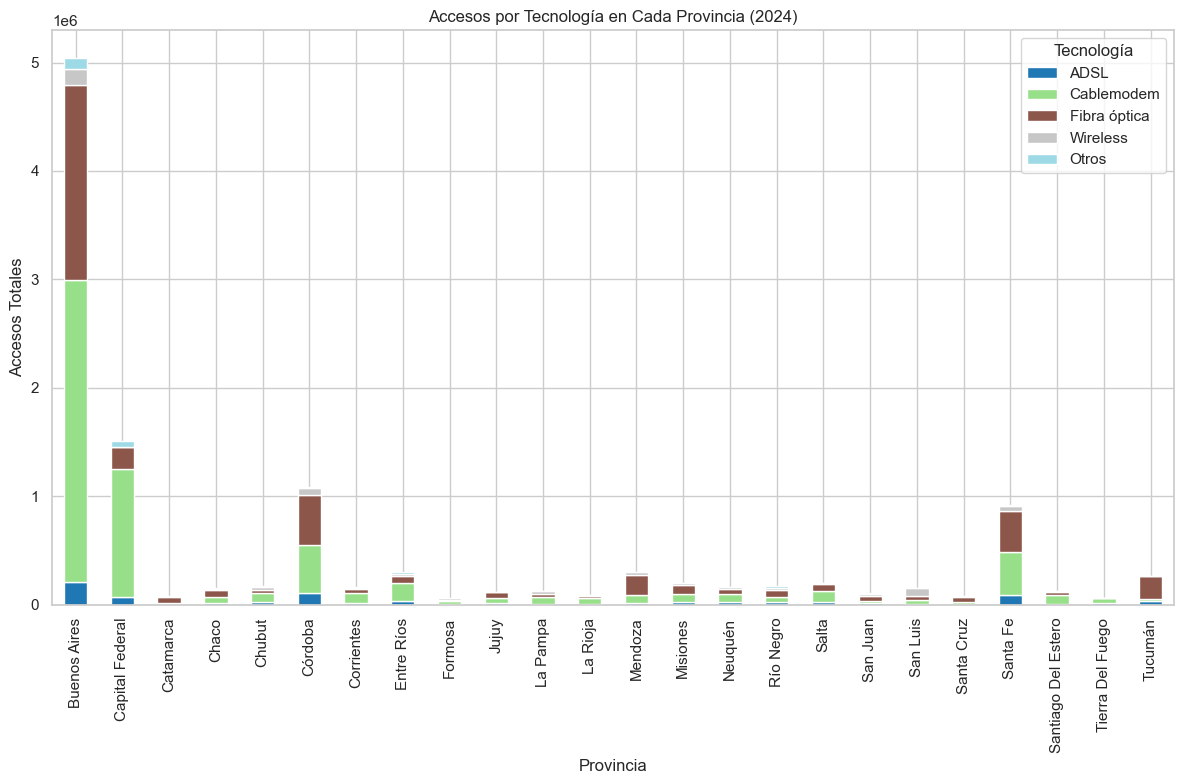

In [173]:
# Filtrar datos para el año 2024
accesos_2024 = accesos_por_tecnologia[accesos_por_tecnologia['Año'] == 2024]

# Crear gráfico de barras apiladas por tecnología
fig, ax = plt.subplots(figsize=(12, 8))
accesos_2024.set_index('Provincia')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].plot(kind='bar', stacked=True, ax=ax, cmap='tab20')

plt.title('Accesos por Tecnología en Cada Provincia (2024)')
plt.ylabel('Accesos Totales')
plt.xlabel('Provincia')
plt.xticks(rotation=90)
plt.legend(title='Tecnología')
plt.tight_layout()
plt.show()

Dominancia de Buenos Aires y Capital Federal:
- Buenos Aires tiene una cantidad desproporcionadamente mayor de accesos en comparación con las otras provincias, con más de 5 millones de accesos. La mayor parte de estos accesos se realizan mediante Cablemodem y Fibra óptica, lo que sugiere una infraestructura avanzada en esta provincia.
- Capital Federal también tiene un número significativamente alto de accesos (alrededor de 1.5 millones), con Cablemodem siendo la tecnología dominante. Esto indica que las grandes áreas metropolitanas tienen mejores infraestructuras y una penetración más alta de tecnologías modernas.

Adopción de Fibra Óptica:
- En provincias como Santa Fe y Buenos Aires, la fibra óptica representa una proporción importante del total de accesos, lo que muestra un esfuerzo por modernizar la infraestructura en estas regiones.
- Otras provincias, como Chaco y Córdoba, también están adoptando fibra óptica, pero en menor proporción. Esto sugiere que la expansión de esta tecnología está en curso, pero es desigual en todo el país.

Infraestructura desigual:
- Provincias como Formosa, Jujuy, La Pampa, y Tierra del Fuego tienen niveles mucho más bajos de accesos a Internet en general, lo que indica una infraestructura menos desarrollada. Estas provincias dependen más de tecnologías como el ADSL, que es una tecnología más antigua en comparación con la fibra óptica o el cablemodem.

Bajo uso de Wireless: 
- A pesar de que Wireless está disponible, su uso es marginal en casi todas las provincias, con la excepción de algunas provincias más rurales o con acceso limitado a tecnologías de fibra y cablemodem. Esto podría sugerir que, aunque wireless es útil en áreas remotas, no es la opción preferida cuando existen otras tecnologías disponibles.

Oportunidades de mejora:
- Provincias como Tucumán, Santiago del Estero, y Santa Cruz podrían beneficiarse de mejoras en la infraestructura tecnológica, dado que su acceso a fibra óptica es limitado. Hay una dependencia continua de tecnologías más antiguas como el Cablemodem o el ADSL.
- Las provincias más grandes y urbanizadas están más avanzadas en la adopción de tecnologías modernas, mientras que las provincias más pequeñas y rurales parecen estar rezagadas.

Perspectiva estratégica:
- Buenos Aires y Capital Federal están claramente en una posición avanzada en cuanto a penetración tecnológica, pero las oportunidades de crecimiento están en provincias con menos desarrollo tecnológico. Expandir la infraestructura de fibra óptica en estas regiones menos atendidas puede ser una estrategia clave para mejorar la calidad del servicio y ampliar la cobertura.
- La baja adopción de Wireless sugiere que, aunque es una tecnología disponible, hay que invertir en tecnologías más estables y confiables como la fibra óptica para mejorar el acceso en las zonas menos conectadas.

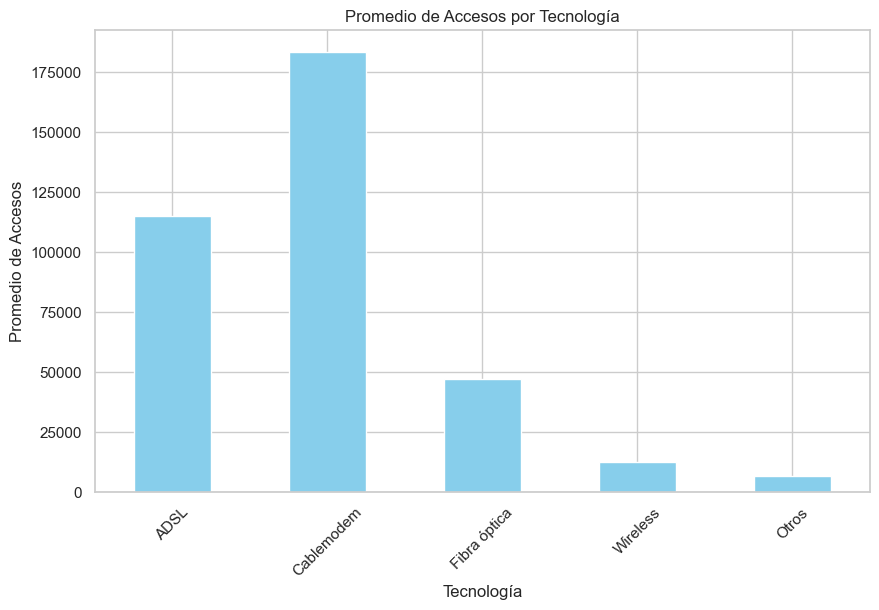

In [145]:
# Eliminar la columna 'Total' ya que no la queremos en el promedio
accesos_tecnologia_sin_total = accesos_por_tecnologia.drop(columns=['Total'])

# Filtrar solo las columnas numéricas después de eliminar 'Total'
accesos_tecnologia_numericas = accesos_tecnologia_sin_total.select_dtypes(include='number')

# Calcular el promedio de accesos por tecnología
promedio_accesos_tecnologia = accesos_tecnologia_numericas.mean()

# Graficar el promedio de accesos por tecnología
plt.figure(figsize=(10, 6))
promedio_accesos_tecnologia.plot(kind='bar', color='skyblue')
plt.title('Promedio de Accesos por Tecnología')
plt.ylabel('Promedio de Accesos')
plt.xlabel('Tecnología')
plt.xticks(rotation=45)
plt.show()

Dominio de Cablemodem:
-El Cablemodem es claramente la tecnología más utilizada, con un promedio de accesos significativamente mayor en comparación con las otras tecnologías. Esto indica que es la opción preferida para muchos hogares en las provincias, probablemente debido a su disponibilidad y costos accesibles en áreas urbanas y suburbanas.

Uso considerable de ADSL:
- ADSL sigue siendo una tecnología importante, aunque es menos avanzada que el Cablemodem o la fibra óptica. Su adopción es aún notable, lo que sugiere que en ciertas áreas, donde la infraestructura más moderna no está disponible, los usuarios dependen de ADSL.

Crecimiento de la Fibra Óptica:
- Fibra óptica muestra un buen promedio de accesos, lo que refleja la modernización gradual de la infraestructura tecnológica en las provincias. Aunque no alcanza los niveles de Cablemodem o ADSL, se espera que siga creciendo en el futuro, especialmente en áreas urbanas más desarrolladas.

Wireless y Otros:
- Las tecnologías Wireless y Otros tienen un promedio de accesos bastante bajo en comparación con las otras tecnologías. Esto sugiere que estas tecnologías son más utilizadas en áreas rurales o en situaciones donde las opciones más robustas no están disponibles. Wireless podría estar en uso en regiones remotas o difíciles de acceder, mientras que 'Otros' podría incluir tecnologías más antiguas o alternativas de menor escala.

Implicaciones:
- Expansión de la Fibra Óptica: A medida que las áreas urbanas continúan desarrollándose, se puede anticipar que la fibra óptica reemplazará en gran medida al ADSL y competirá con el Cablemodem como la tecnología de acceso principal. Invertir en la expansión de esta tecnología sería estratégico para mejorar la calidad y velocidad del servicio.
- Actualización de Infraestructuras: El uso persistente de ADSL indica que ciertas áreas aún dependen de tecnologías más antiguas. Estas zonas podrían ser objetivos para la actualización a tecnologías más modernas, lo que mejoraría tanto la velocidad como la confiabilidad del servicio.
- Oportunidades en Regiones Rurales: Dado el bajo uso de Wireless y otras tecnologías, parece haber una oportunidad de crecimiento en las áreas rurales que carecen de acceso a infraestructuras más avanzadas. Ampliar el acceso a través de tecnologías más robustas podría mejorar el servicio y abrir nuevos mercados en estas áreas menos desarrolladas.

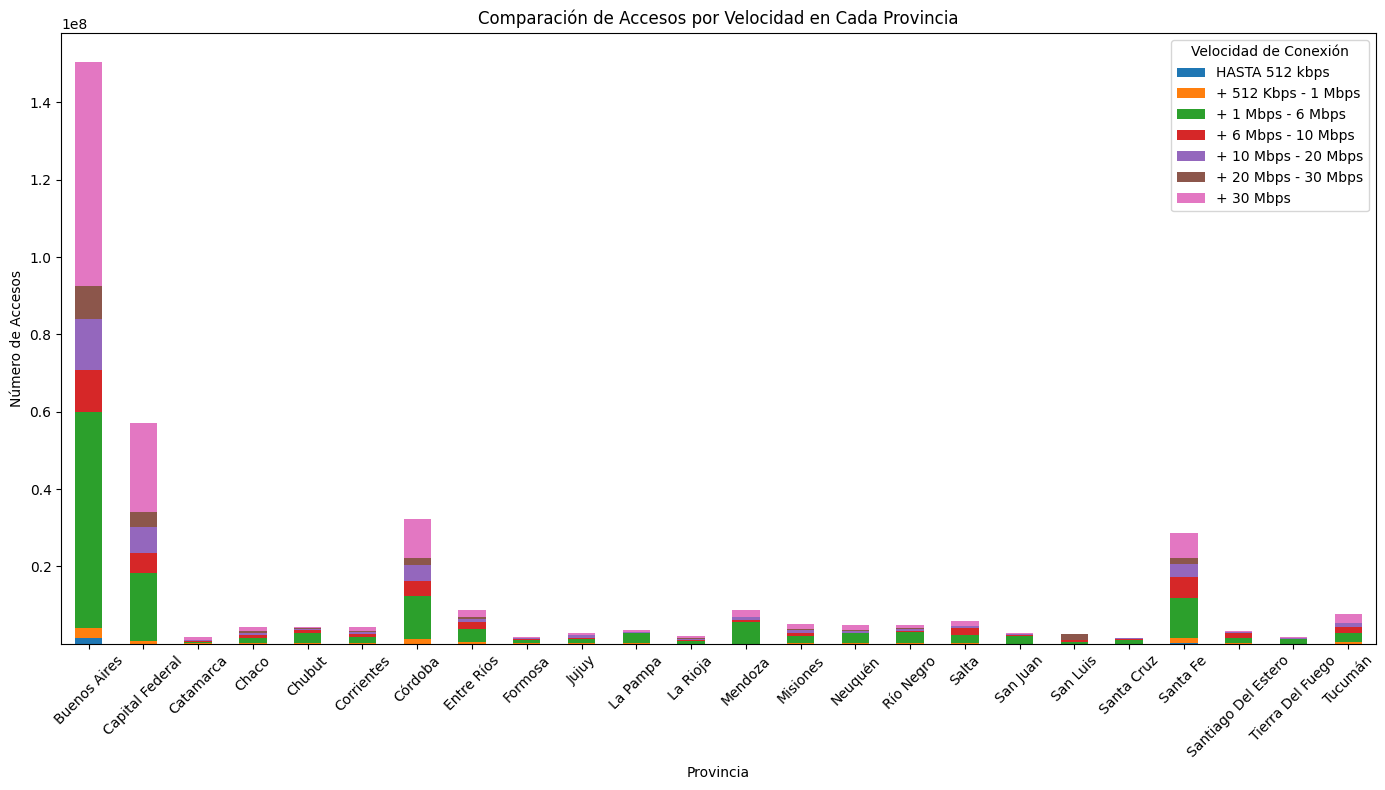

In [36]:
# 1. Comparación de Velocidades por Provincia
# Seleccionamos las columnas relevantes para comparar velocidades por provincia
velocidades_columns = ['Provincia', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']

# Agrupamos por provincia y sumamos los accesos
velocidades_provincia = acc_por_velocidad.groupby('Provincia')[velocidades_columns[1:]].sum()

# Gráfico de comparación de velocidades por provincia
velocidades_provincia.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Comparación de Accesos por Velocidad en Cada Provincia')
plt.ylabel('Número de Accesos')
plt.xlabel('Provincia')
plt.legend(title='Velocidad de Conexión')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Desigualdad en el Acceso a Internet:
Buenos Aires y Capital Federal dominan de manera abrumadora en términos de accesos a internet en todas las velocidades, especialmente en conexiones de más de 30 Mbps.
En contraste, provincias como Santiago del Estero, Chaco, La Rioja, Formosa y otras tienen una presencia muy limitada en accesos de alta velocidad, lo cual indica una gran disparidad en la infraestructura de internet entre provincias.

- Oportunidades de Crecimiento en Provincias con Baja Conectividad:
La empresa podría enfocarse en mejorar la infraestructura en provincias como Catamarca, Santiago del Estero, Formosa, y La Rioja, donde la penetración de internet de alta velocidad es baja. Estas provincias podrían representar una oportunidad de crecimiento para la compañía si se invierte en aumentar la capacidad de acceso a velocidades más altas.
Se recomienda realizar estudios de mercado para identificar las demandas específicas de estos lugares y ofrecer paquetes personalizados que fomenten el aumento de suscriptores a internet de mayor velocidad.

- Necesidad de Mejorar la Infraestructura de Alta Velocidad:
Las conexiones de más de 30 Mbps dominan en Buenos Aires, Capital Federal, Córdoba, y Santa Fe, lo que sugiere que hay una demanda considerable por internet de alta velocidad en estas áreas. La empresa podría continuar invirtiendo en fibras ópticas y tecnologías de alta capacidad en estas zonas urbanas.
En provincias con menor infraestructura, la empresa debe analizar la viabilidad de expandir redes de fibra óptica y tecnología de alta velocidad para captar un nuevo mercado de consumidores.

- Disminuir la Dependencia en Conexiones Lentas:
Aunque la tendencia general es hacia velocidades más altas, todavía hay una dependencia significativa de las conexiones lentas (hasta 512 kbps) en algunas provincias. Esto podría indicar que ciertas regiones aún dependen de tecnologías antiguas como ADSL o conexiones de baja calidad. Se recomienda comenzar un proceso de transición y modernización de las redes en estas áreas para reducir la brecha digital y mejorar la experiencia del usuario.

- Estrategias de Diferenciación por Región:
Cada región parece tener una distribución diferente de velocidades, lo que sugiere que la empresa debería diferenciar su estrategia según la provincia. En áreas urbanas con alta penetración de internet rápido, se podrían ofrecer servicios premium, mientras que en regiones más rezagadas, podrían ofrecerse paquetes accesibles con planes para mejorar progresivamente la velocidad de acceso.

- Planes de Expansión de Redes Inalámbricas:
Las conexiones inalámbricas (Wireless) también parecen estar presentes en varias provincias, lo que sugiere que la empresa podría expandir redes inalámbricas en áreas donde la infraestructura cableada es difícil de instalar.

La empresa puede aprovechar estas observaciones para ajustar su estrategia de expansión, enfocándose en la mejora de la infraestructura en provincias rezagadas y consolidando su dominio en las áreas más desarrolladas. Además, podría desarrollar planes de transición tecnológica en las provincias que aún dependen de conexiones lentas y antiguas. Además se podría consdierar priorizar inversiones en regiones que tengan una mayor demanda latente de internet de alta velocidad

En base a lo que obtuvimos, profundicemos un poco más en las provincias que tienen acceso a una velocidad lenta de Internet

                 HASTA 512 kbps  + 512 Kbps - 1 Mbps  Total Lentas
Provincia                                                         
Buenos Aires         1449330.84            2694282.0    4143612.84
Santa Fe              115482.00            1434741.0    1550223.00
Córdoba                11569.00            1214000.0    1225569.00
Capital Federal        32052.16             762534.0     794586.16
Entre Ríos             39683.00             420149.0     459832.00
Tucumán                 2264.00             368832.0     371096.00
La Pampa               48359.00             213368.0     261727.00
Corrientes              1697.00             236866.0     238563.00
Salta                  15444.00             209579.0     225023.00
Misiones               16519.00             205019.0     221538.00


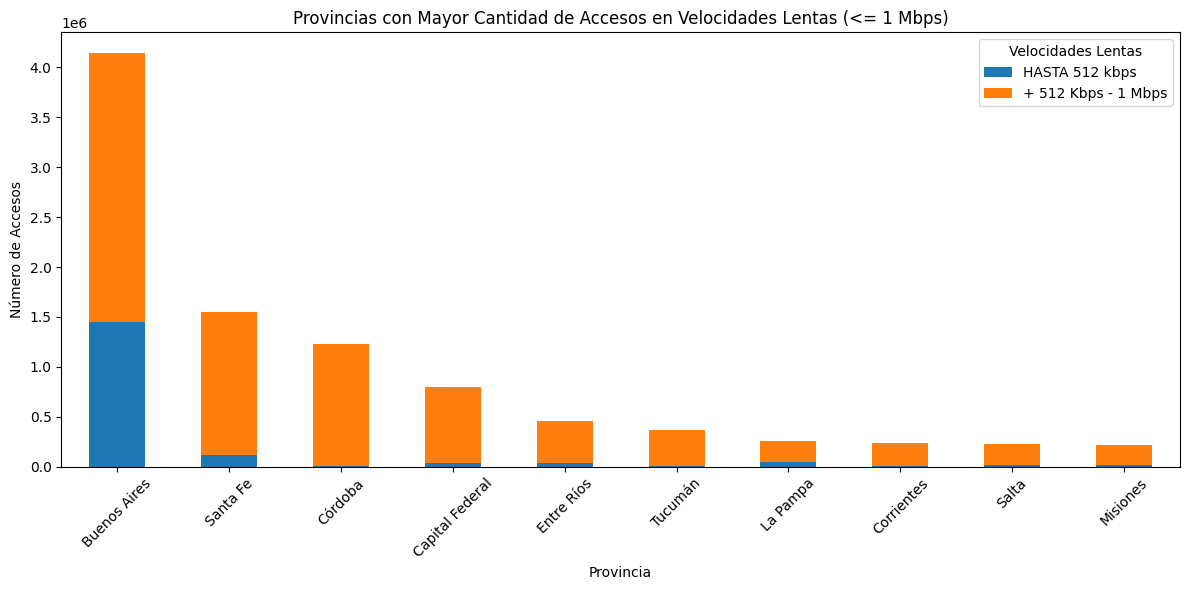

In [79]:
# Seleccionamos las columnas relevantes para identificar las velocidades más lentas
velocidades_lentas_columns = ['Provincia', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps']

# Agrupamos por provincia y sumamos los accesos a las velocidades más lentas
velocidades_lentas = acc_por_velocidad.groupby('Provincia')[velocidades_lentas_columns[1:]].sum()

# Calculamos el total de accesos lentos por provincia (suma de las dos velocidades más lentas)
velocidades_lentas['Total Lentas'] = velocidades_lentas['HASTA 512 kbps'] + velocidades_lentas['+ 512 Kbps - 1 Mbps']

# Ordenamos las provincias por las velocidades más lentas
velocidades_lentas_ordenadas = velocidades_lentas.sort_values(by='Total Lentas', ascending=False)

# Filtramos las provincias con mayores accesos en velocidades lentas
provincias_lentas_top = velocidades_lentas_ordenadas.head(10)  # Muestra las 10 provincias con más accesos lentos

# Mostramos el resultado
print(provincias_lentas_top)

# Gráfico de las provincias con más accesos en velocidades lentas
provincias_lentas_top[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Provincias con Mayor Cantidad de Accesos en Velocidades Lentas (<= 1 Mbps)')
plt.ylabel('Número de Accesos')
plt.xlabel('Provincia')
plt.xticks(rotation=45)
plt.legend(title='Velocidades Lentas')
plt.tight_layout()
plt.show()

- Provincia de Buenos Aires:
Buenos Aires tiene, por mucho, la mayor cantidad de accesos en velocidades lentas. Gran parte de los accesos están en el rango de + 512 Kbps - 1 Mbps (naranja), aunque también hay un número considerable en la categoría HASTA 512 kbps (azul).
Esto indica que, aunque Buenos Aires es la provincia más desarrollada en términos de conectividad, también tiene una gran cantidad de conexiones lentas que podrían mejorarse. Es una oportunidad para actualizar la infraestructura y mejorar el servicio.
__Se podrían hacer esfuerzos para modernizar la infraestructura, especialmente en áreas con accesos de menos de 1 Mbps.__

- Santa Fe, Córdoba y Capital Federal:
Estas provincias también muestran una cantidad significativa de accesos en velocidades lentas, pero mucho menor en comparación con Buenos Aires. La mayoría de las conexiones lentas en estas provincias están en el rango de + 512 Kbps - 1 Mbps.
Aquí también hay espacio para mejoras, especialmente en áreas rurales o menos desarrolladas dentro de estas provincias.
__Estas provincias deberían estar en el radar para futuras actualizaciones de la red, presentar oportunidad para mejorar la calidad del servicio.__

- Otras Provincias (Entre Ríos, Tucumán, etc.):
Las provincias como Entre Ríos, Tucumán, La Pampa, Corrientes, Salta, y Misiones tienen un menor número de accesos en velocidades lentas, pero aún están presentes. Estas provincias muestran menos conexiones en el rango más lento (HASTA 512 kbps).
Aunque los números son menores, podría ser estratégico enfocar esfuerzos en mejorar las infraestructuras en estas provincias para igualar las velocidades de conexión con provincias más avanzadas.
__Las provincias más pequeñas o menos desarrolladas también deberían ser parte de una estrategia de mejora, ya que reducir las conexiones lentas puede generar una mayor adopción de servicios de mayor velocidad.__

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13564\1054060861.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(penetracion_vs_accesos['Accesos por cada 100 hogares'][i],
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13564\1054060861.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  penetracion_vs_accesos['Total'][i],


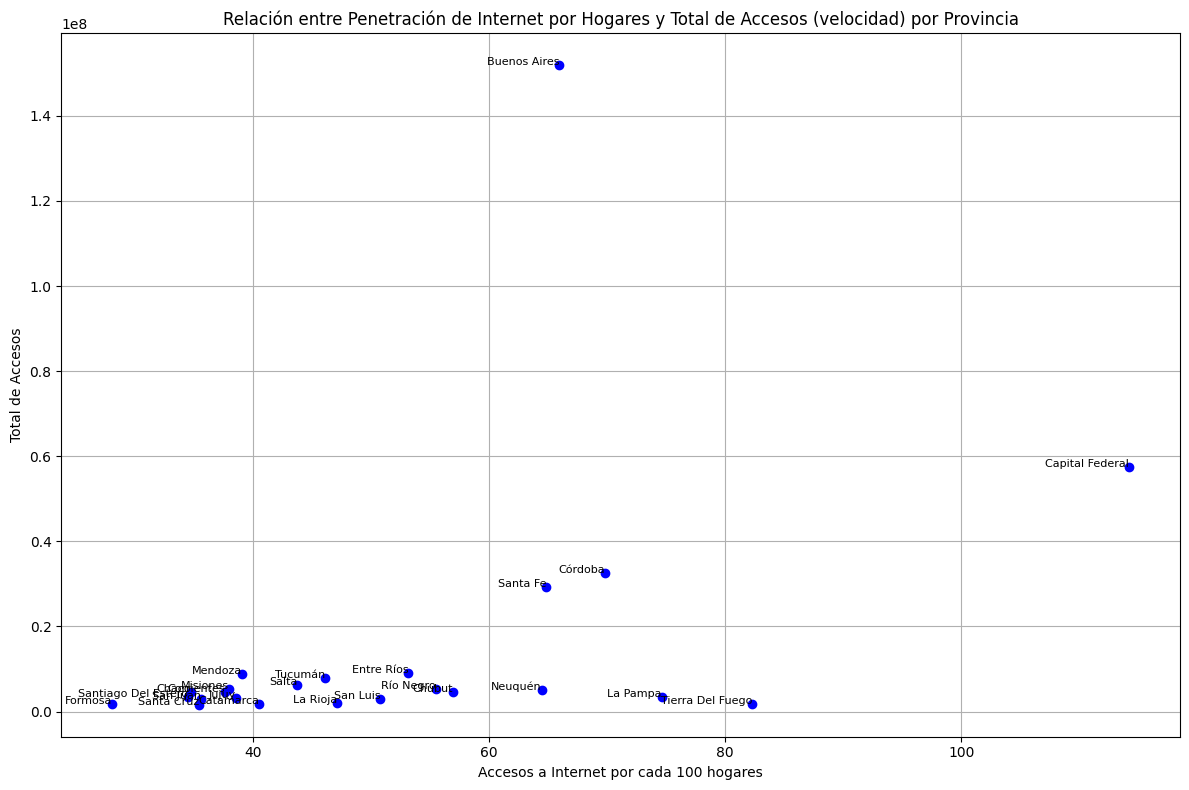

In [80]:
# 2. Relación entre Accesos y Penetración por Hogares
# Unimos los datos de penetración con los de accesos por provincia
penetracion_hogares_grouped = penetracion_hogares.groupby('Provincia').mean()
total_accesos_provincia = acc_por_velocidad.groupby('Provincia')['Total'].sum()

# Creamos un DataFrame combinado
penetracion_vs_accesos = pd.concat([total_accesos_provincia, penetracion_hogares_grouped['Accesos por cada 100 hogares']], axis=1).dropna()

plt.figure(figsize=(12, 8))
plt.scatter(penetracion_vs_accesos['Accesos por cada 100 hogares'], penetracion_vs_accesos['Total'], color='blue')

# Añadir etiquetas de provincias
for i, province in enumerate(penetracion_vs_accesos.index):
    plt.text(penetracion_vs_accesos['Accesos por cada 100 hogares'][i], 
             penetracion_vs_accesos['Total'][i], 
             province, fontsize=8, ha='right')

plt.title('Relación entre Penetración de Internet por Hogares y Total de Accesos (velocidad) por Provincia')
plt.xlabel('Accesos a Internet por cada 100 hogares')
plt.ylabel('Total de Accesos')
plt.grid(True)
plt.tight_layout()
plt.show()

- Capital Federal y Buenos Aires destacan:
Capital Federal tiene una penetración muy alta de internet por hogar (alrededor de 100 accesos por cada 100 hogares), lo que sugiere que casi todos los hogares tienen acceso a internet. Sin embargo, su total de accesos es menor en comparación con Buenos Aires.
Buenos Aires, por otro lado, tiene un enorme número de accesos totales, con alrededor de 1.4e8 accesos, pero su penetración por hogar es mucho menor que la de Capital Federal, indicando que aunque hay muchos accesos, no están tan bien distribuidos en los hogares.

Aunque Capital Federal muestra una alta penetración, parece haber espacio para incrementar los accesos totales. Por otro lado, Buenos Aires debería enfocarse en mejorar la distribución del acceso a internet por hogar, ya que tiene una cantidad considerable de accesos, pero no está tan bien distribuido entre los hogares.

- Santa Fe y Córdoba:
Ambas provincias están en una zona intermedia en términos de total de accesos, con valores más bajos que Buenos Aires pero superiores a muchas otras provincias.
Sin embargo, su penetración de internet por hogares es relativamente baja en comparación con Capital Federal y otras provincias con menor población.

Estas provincias tienen potencial de crecimiento tanto en penetración como en el total de accesos. Una estrategia podría ser aumentar la infraestructura en estas áreas para mejorar la penetración y aprovechar su tamaño poblacional.

- Provincias con baja penetración y bajos accesos:
Provincias como Santiago del Estero, Salta, San Juan, Formosa y La Rioja muestran tanto baja penetración de internet por hogar (menos de 50 accesos por cada 100 hogares) como bajo total de accesos. Esto indica que son regiones que podrían estar experimentando una menor cobertura o capacidad de infraestructura.

En estas áreas, la empresa debería enfocar sus esfuerzos en mejorar la infraestructura de telecomunicaciones, ya que tanto la penetración por hogar como los accesos totales son bajos. Estas provincias podrían representar oportunidades de crecimiento si se mejora la conectividad.

- Provincias con buena penetración, pero bajos accesos:
La Pampa y Tierra del Fuego muestran una penetración relativamente buena (cerca de 80 accesos por cada 100 hogares), pero sus totales de acceso son muy bajos. Esto podría sugerir que aunque una proporción significativa de la población tiene acceso a internet, el número total de usuarios es bajo debido a la baja densidad poblacional.

Para provincias como La Pampa y Tierra del Fuego, la empresa podría considerar estrategias de expansión de mercado, ya que aunque la penetración es buena, el número total de accesos sigue siendo bajo. Una posible estrategia es promover el uso de servicios de internet en estas regiones menos pobladas.

Filtramos las provincias que tienen menor penetración de Internet por hogares (menos de 50 accesos por cada 100 hogares.)

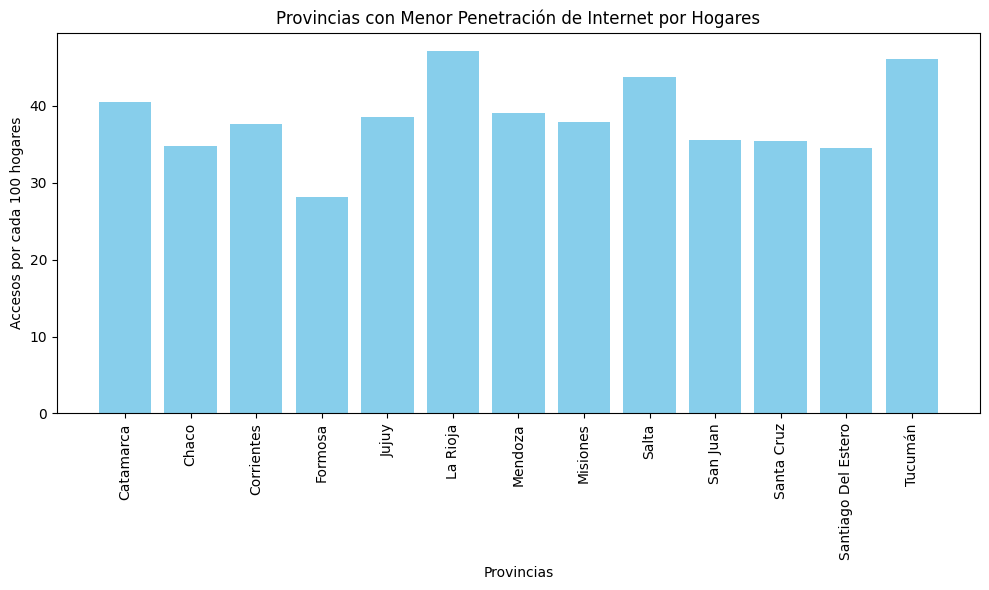

In [77]:
# Filtrar las provincias con menor penetración
provincias_menor_penetracion = penetracion_hogares_grouped[penetracion_hogares_grouped['Accesos por cada 100 hogares'] < 50]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(provincias_menor_penetracion.index, provincias_menor_penetracion['Accesos por cada 100 hogares'], color='skyblue')
plt.xlabel('Provincias')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Provincias con Menor Penetración de Internet por Hogares')
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Estas provincias con menor penetración indican que hay una menor adopción de internet en los hogares, lo que puede deberse a factores como limitaciones de infraestructura, menor densidad poblacional, o costos elevados de los servicios de internet. Estas áreas representan oportunidades clave para la empresa para expandir su cobertura y mejorar la penetración, posiblemente mediante incentivos o mejoras en la infraestructura para hacer los servicios más accesibles.

### Analizamos la hoja Dial_Baf (Accesos dial-up y Banda Ancha Fija (BAf).)
Representa los datos de los accesos a los mismos

In [83]:
Dial_BAf.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2024,1,Buenos Aires,5038657,5900.0,5044557
1,2024,1,Capital Federal,1502661,2050.0,1504711
2,2024,1,Catamarca,74932,1.0,74933
3,2024,1,Chaco,155538,5.0,155543
4,2024,1,Chubut,169819,857.0,170676


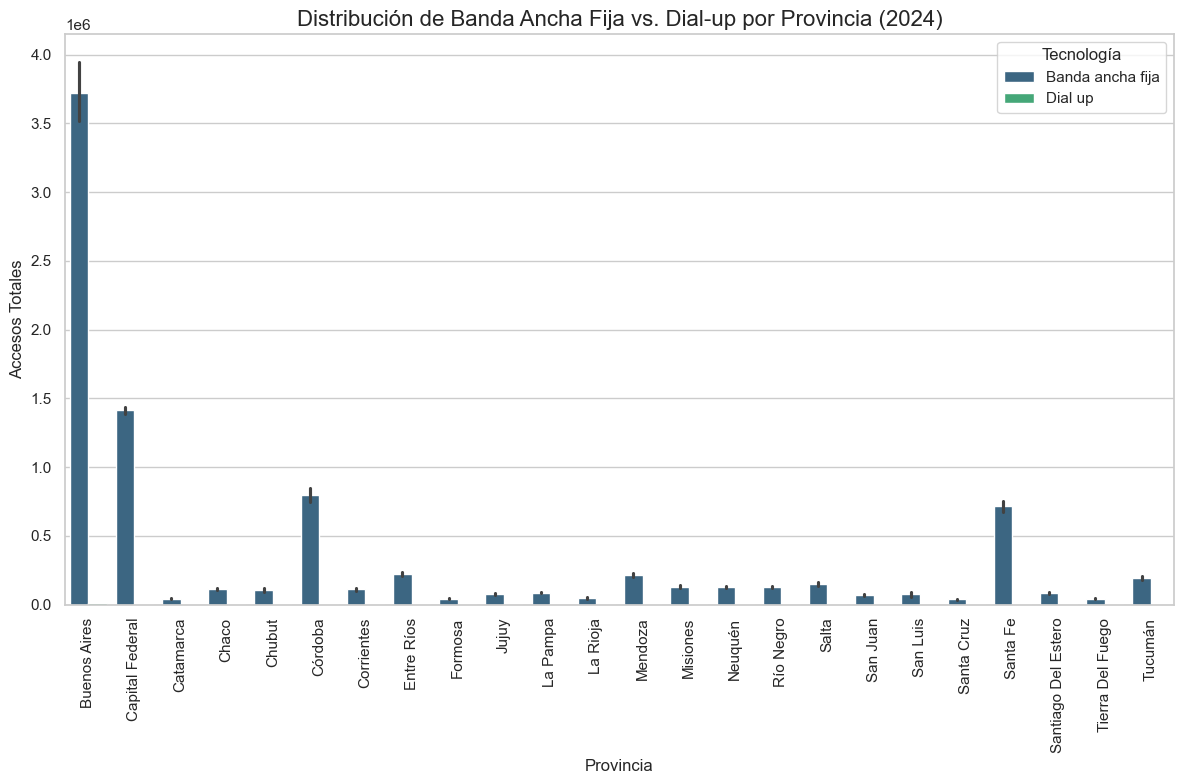

In [178]:
# Crear un DataFrame para la comparación de Banda Ancha vs. Dial-up por provincia
Dial_BAF_long = pd.melt(Dial_BAf, id_vars=['Provincia'], value_vars=['Banda ancha fija', 'Dial up'], 
                        var_name='Tecnología', value_name='Accesos')

# Crear un gráfico de barras apiladas para visualizar la comparación
plt.figure(figsize=(12, 8))
sns.barplot(data=Dial_BAF_long, x='Provincia', y='Accesos', hue='Tecnología', palette='viridis')
plt.title('Distribución de Banda Ancha Fija vs. Dial-up por Provincia (2024)', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Accesos Totales')
plt.xlabel('Provincia')
plt.legend(title='Tecnología')
plt.tight_layout()
plt.show()

- Banda Ancha Dominante: Buenos Aires y Capital Federal tienen una gran cantidad de accesos a Banda Ancha Fija en comparación con otras provincias. Santa Fe también destaca.
- Dial-up Marginal: El uso de Dial-up es insignificante en comparación con Banda Ancha Fija en la mayoría de las provincias, siendo más visible en algunas provincias, pero sigue siendo minoritario.
__Se refleja la adopción casi total de banda ancha fija en las provincias más desarrolladas__

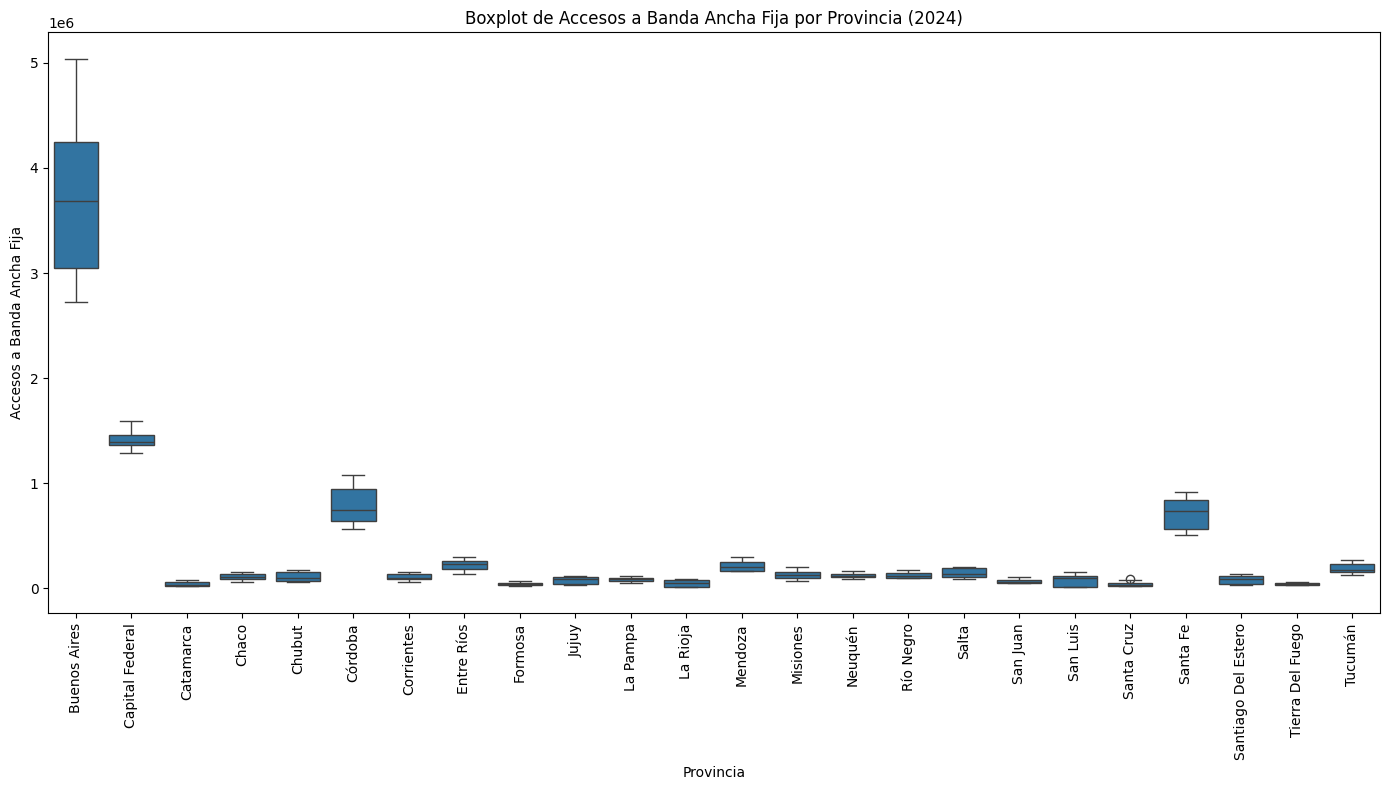

In [62]:
# Fusionar los dataframes en función de 'Provincia' y 'Año'
df_combined = pd.merge(Dial_BAf, penetracion_hogares, on=['Provincia', 'Año', 'Trimestre'])

# Graficar un boxplot para identificar outliers en el acceso a Banda Ancha Fija por provincia
plt.figure(figsize=(14, 8))
sns.boxplot(x='Provincia', y='Banda ancha fija', data=df_combined)
plt.xticks(rotation=90)
plt.title('Boxplot de Accesos a Banda Ancha Fija por Provincia (2024)')
plt.ylabel('Accesos a Banda Ancha Fija')
plt.xlabel('Provincia')
plt.tight_layout()

plt.show()

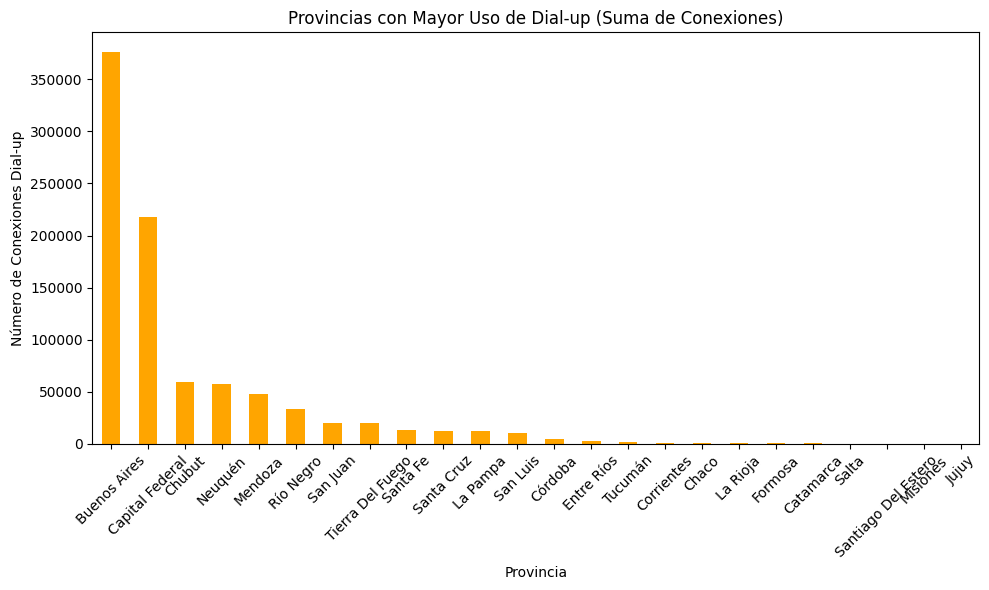

In [81]:
# Filtrar las provincias con uso persistente de Dial-up en los últimos años
uso_dialup_persistente = Dial_BAf[Dial_BAf['Dial up'] > 0].groupby('Provincia')['Dial up'].sum().sort_values(ascending=False)

# Graficar las provincias con mayor uso de Dial-up
plt.figure(figsize=(10, 6))
uso_dialup_persistente.plot(kind='bar', color='orange')
plt.title('Provincias con Mayor Uso de Dial-up (Suma de Conexiones)')
plt.ylabel('Número de Conexiones Dial-up')
plt.xlabel('Provincia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Concentración del Uso de Dial-up:
Buenos Aires y Capital Federal destacan como las provincias con el mayor número de conexiones Dial-up, con Buenos Aires liderando significativamente.
Estas dos provincias son, de lejos, las que más conexiones Dial-up mantienen, lo que podría deberse a la alta densidad de población y la presencia de áreas donde la infraestructura de banda ancha no ha sido implementada o donde el acceso a tecnologías más avanzadas es limitado.

- Uso Residual de Dial-up:
Provincias como Neuquén, Mendoza, Río Negro, y San Juan aún tienen un número significativo de conexiones Dial-up, lo que sugiere que existen áreas donde la transición hacia tecnologías de banda ancha más modernas no ha sido completa.
Las provincias más alejadas, con menor densidad de población o menos desarrolladas en términos de infraestructura tecnológica, presentan un uso mucho menor de Dial-up en comparación con Buenos Aires y Capital Federal, pero aún persisten.

- Oportunidad de Mejora en Infraestructura:
Este gráfico evidencia la necesidad de una actualización tecnológica en las provincias con un alto uso de Dial-up, especialmente en Buenos Aires y Capital Federal, para reducir esta dependencia de tecnologías obsoletas.
Las empresas de telecomunicaciones podrían enfocarse en áreas específicas donde aún persisten estas conexiones, ya que representan oportunidades claras para implementar soluciones de banda ancha fija o móvil.

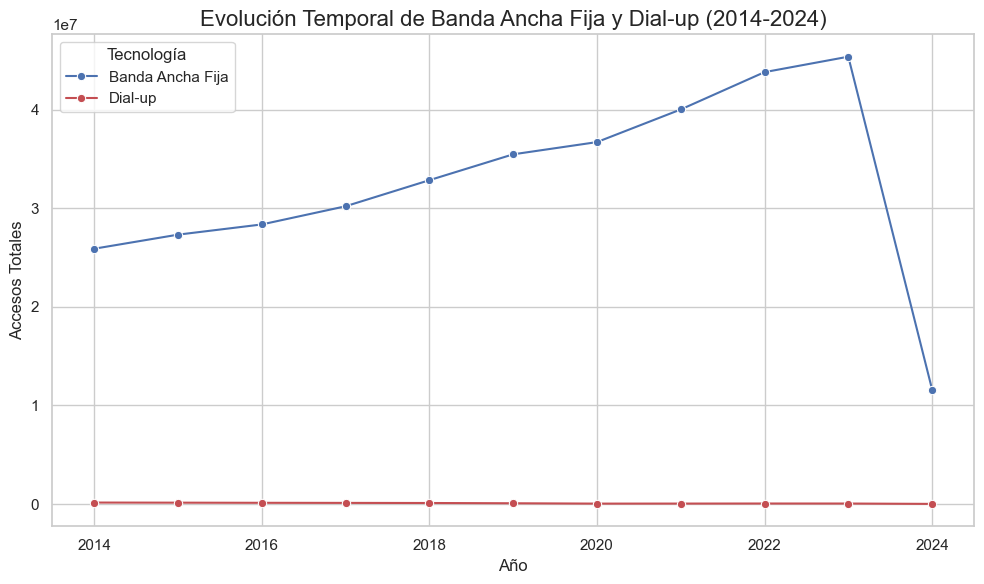

In [182]:
# Crear un gráfico de líneas para mostrar la evolución temporal de Banda Ancha Fija y Dial-up a lo largo de los años

# Agrupar por año y sumar los accesos de Banda Ancha Fija y Dial-up para cada año
evolucion_temporal = Dial_BAf.groupby('Año')[['Banda ancha fija', 'Dial up']].sum().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=evolucion_temporal, x='Año', y='Banda ancha fija', label='Banda Ancha Fija', marker='o', color='b')
sns.lineplot(data=evolucion_temporal, x='Año', y='Dial up', label='Dial-up', marker='o', color='r')
plt.title('Evolución Temporal de Banda Ancha Fija y Dial-up (2014-2024)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Accesos Totales', fontsize=12)
plt.legend(title='Tecnología')
plt.tight_layout()
plt.show()

- Tendencia Creciente de Banda Ancha Fija: Desde 2014, la cantidad de accesos a Banda Ancha Fija ha tenido un crecimiento constante hasta 2023.
- Dial-up Estancado: El uso de Dial-up ha permanecido prácticamente constante y en niveles extremadamente bajos durante todo el período, lo que indica que la transición hacia tecnologías más avanzadas como la Banda Ancha Fija ya está completamente consolidada.

- La adopción de Banda Ancha Fija ha sido dominante y ha mostrado un crecimiento sostenido en la última década, mientras que Dial-up está prácticamente obsoleto. Por lo que la empresa debería priorizar las inversiones en infraestructura de Banda Ancha Fija y descontinuar el soporte para Dial-up.

In [84]:
ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2023,2,1.180603e+08,Jun-Mar 2023
4,2033,1,1.041350e+08,Ene-Mar 2023


Nos encontramos con un valor 2033 que debería ser 2023, vamos a solucionarlo.

In [90]:
# Reemplazar el valor incorrecto de 2033 por 2023 en la columna 'Año'
ingresos['Año'] = ingresos['Año'].replace(2033, 2023)

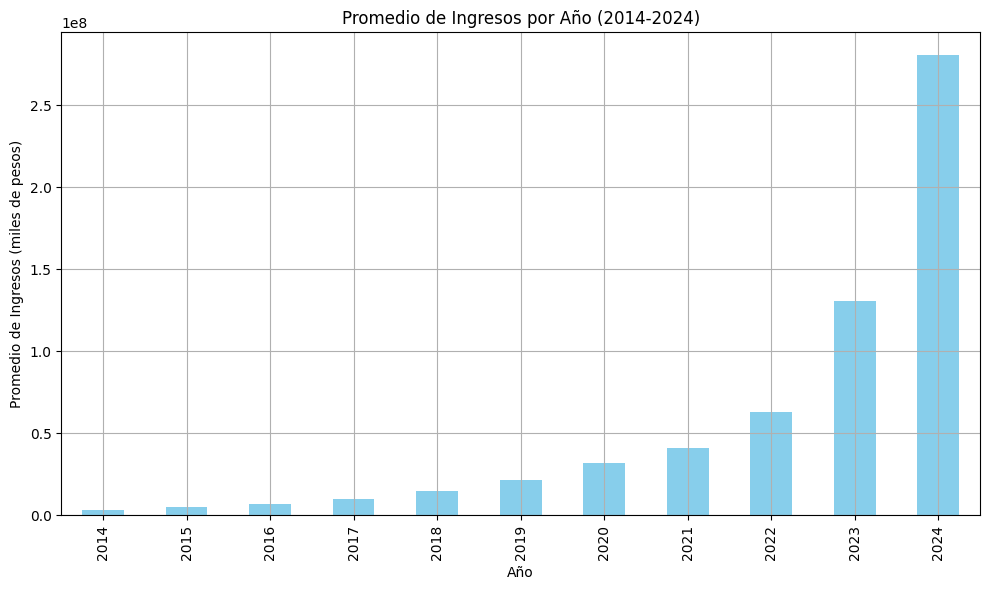

In [91]:
# Agrupar por año para mostrar el promedio anual en lugar de por trimestres
promedio_anual = ingresos.groupby('Año')['Ingresos (miles de pesos)'].mean()

# Gráfico de barras para promedio de ingresos anuales
plt.figure(figsize=(10, 6))
promedio_anual.plot(kind='bar', color='skyblue')
plt.title('Promedio de Ingresos por Año (2014-2024)')
plt.xlabel('Año')
plt.ylabel('Promedio de Ingresos (miles de pesos)')
plt.grid(True)
plt.tight_layout()
plt.show()

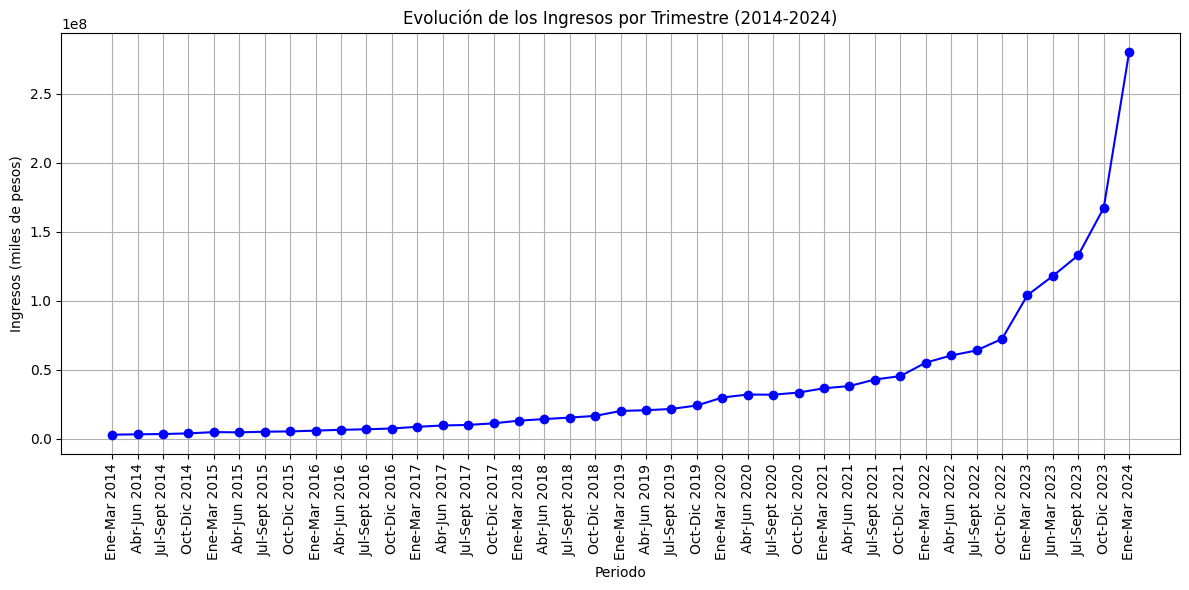

In [92]:
# Ordenar los datos por año y trimestre para una secuencia correcta
ingresos = ingresos.sort_values(by=['Año', 'Trimestre'])

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(ingresos['Periodo'], ingresos['Ingresos (miles de pesos)'], marker='o', linestyle='-', color='b')
plt.title('Evolución de los Ingresos por Trimestre (2014-2024)')
plt.xlabel('Periodo')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Importamos el dataset de Televisión para sumarlo al análisis

In [6]:
# Leer todas las hojas del archivo Excel
television_dataset = 'Television.xlsx'
television_file = pd.ExcelFile(television_dataset)

Accedemos a las hojas que consideramos relevantes

In [10]:
Accesos_prov_TV = pd.read_excel(television_file, sheet_name='Accesos_prov_TV')
Ingresos_TV = pd.read_excel(television_file, sheet_name='Ingresos_TV')
Penetracion_prov_TV = pd.read_excel(television_file, sheet_name='Penetracion_prov_TV')

Analicemos los accesos por provincia para la televisión en cuanto a suscripciones

In [28]:
Accesos_prov_TV

,Año,Trimestre,Provincia,Accesos TV por suscripción (Vrf)
0,2024,1,Buenos Aires,3000167
1,2024,1,Capital Federal,705786
2,2024,1,Catamarca,51061
3,2024,1,Chaco,116721
4,2024,1,Chubut,77969
...,...,...,...,...
979,2014,1,Santa Cruz,21133
980,2014,1,Santa Fe,546523
981,2014,1,Santiago del Estero,92972
982,2014,1,Tierra del Fuego,29886


In [16]:
# Verificamos si hay valores nulos
Accesos_prov_TV.isnull().sum()

Año                                 0
Trimestre                           0
Provincia                           0
Accesos TV por suscripción (Vrf)    0
dtype: int64

In [18]:
# Verificamos la consistencia de los nombres de las provincias
provincias_unicas = Accesos_prov_TV['Provincia'].unique()

In [24]:
# Verificamos los rangos de los valores de años y trimestres
Accesos_prov_TV['Año'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014],
      dtype=int64)

In [25]:
Accesos_prov_TV['Trimestre'].unique()

array([1, 4, 3, 2], dtype=int64)

Vemos que los datos son los esperados, en cuanto a su contenido y formato

In [22]:
# Verificamos el tipo de los valores numéricos
Accesos_prov_TV.dtypes

Año                                  int64
Trimestre                            int64
Provincia                           object
Accesos TV por suscripción (Vrf)     int64
dtype: object

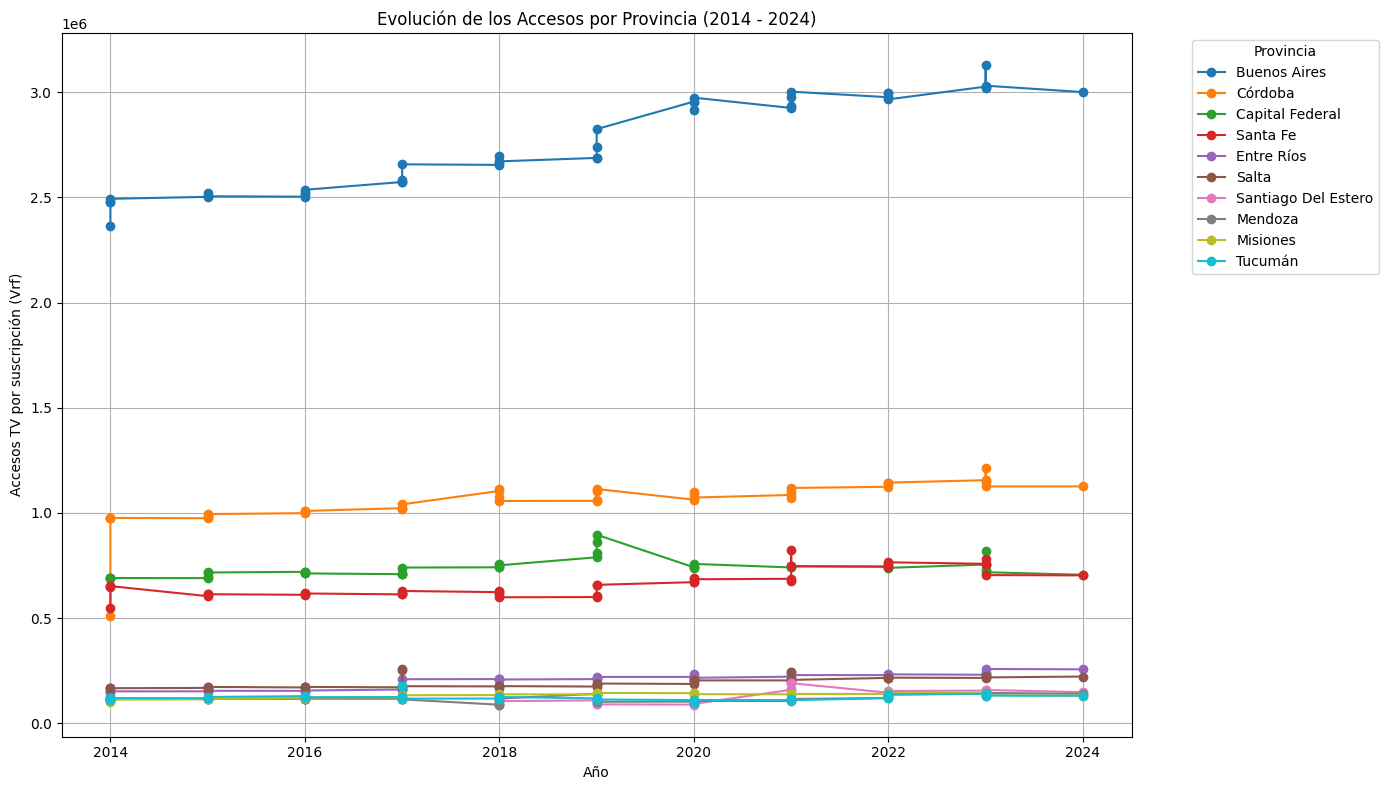

In [30]:
# Seleccionar las provincias con mayor cantidad de accesos en 2024 (puedes ajustar esto según lo que te interese)
top_provincias = Accesos_prov_TV[Accesos_prov_TV['Año'] == 2024].nlargest(10, 'Accesos TV por suscripción (Vrf)')['Provincia']

# Filtrar el dataframe para solo incluir esas provincias
df_top = Accesos_prov_TV[Accesos_prov_TV['Provincia'].isin(top_provincias)]

# Generar el gráfico
plt.figure(figsize=(14, 8))
for provincia in top_provincias:
    data_provincia = df_top[df_top['Provincia'] == provincia]
    plt.plot(data_provincia['Año'], data_provincia['Accesos TV por suscripción (Vrf)'], marker='o', label=provincia)

plt.title('Evolución de los Accesos por Provincia (2014 - 2024)')
plt.xlabel('Año')
plt.ylabel('Accesos TV por suscripción (Vrf)')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

- Buenos Aires tiene consistentemente el mayor número de accesos a TV por suscripción, y ha mostrado un leve aumento en el periodo analizado.
- Capital Federal, Córdoba, y Santa Fe siguen siendo las provincias con un número significativo de accesos, aunque sin grandes cambios a lo largo de los años.
- Otras provincias como Tucumán, Misiones, y Salta tienen accesos significativamente menores en comparación con las provincias principales.
- La mayoría de las provincias muestran un crecimiento estable o ligeramente ascendente, sin grandes picos o caídas bruscas, lo que podría indicar una penetración ya establecida en estos mercados.

In [31]:
Penetracion_prov_TV

,Año,Trimestre,Provincia,Accesos TV por suscripción por cada 100 hab,Accesos TV por suscripción por cada 100 hogares
0,2024,1,Buenos Aires,16.530000,48.240000
1,2024,1,Capital Federal,22.880000,56.070000
2,2024,1,Catamarca,11.930000,46.890000
3,2024,1,Chaco,9.370000,35.040000
4,2024,1,Chubut,11.890000,38.780000
...,...,...,...,...,...
979,2014,1,Santa Cruz,6.785490,22.850465
980,2014,1,Santa Fe,16.220356,51.617111
981,2014,1,Santiago del Estero,10.126047,40.836081
982,2014,1,Tierra del Fuego,20.173751,68.181955
